In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
book= pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book.shape

(2000, 11)

In [6]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [9]:
book.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


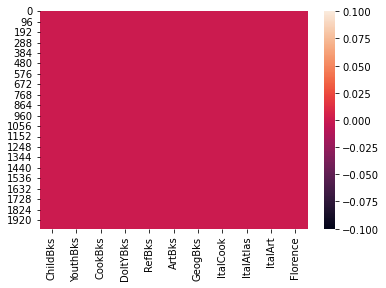

In [10]:
sns.heatmap(book.isnull())
plt.show()

In [11]:
book_1 = book.iloc[:,0:5]

In [12]:
book_1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks
0,0,1,0,1,0
1,1,0,0,0,0
2,0,0,0,0,0
3,1,1,1,0,1
4,0,0,1,0,0
...,...,...,...,...,...
1995,0,0,1,0,0
1996,0,0,0,0,0
1997,0,0,0,0,0
1998,0,0,1,0,0


In [13]:
df1 = pd.get_dummies(book_1)

In [14]:
df1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks
0,0,1,0,1,0
1,1,0,0,0,0
2,0,0,0,0,0
3,1,1,1,0,1
4,0,0,1,0,0
...,...,...,...,...,...
1995,0,0,1,0,0
1996,0,0,0,0,0
1997,0,0,0,0,0
1998,0,0,1,0,0


In [15]:
book_2 = book.iloc[:,5:15]

In [16]:
book_2

,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
1995,1,1,1,0,1,1
1996,0,0,0,0,0,0
1997,0,0,0,0,0,0
1998,0,0,0,0,0,0


In [25]:
#Associations Rule with 0.10% support and 0.70% confidence interval
# with 0.10% support
frequent_itemsets = apriori(book,min_support=0.1,use_colnames= True)
frequent_itemsets['lenght']= frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [26]:
frequent_itemsets

,support,itemsets,lenght
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [27]:
## with 0.70% threshold or confidence
rules = association_rules(frequent_itemsets,metric = 'lift',min_threshold=0.7)

In [28]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [29]:
rules['antecedents_len']= rules['antecedents'].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,1
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,1
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,1
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,1
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,1
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,2
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,1
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,1


In [30]:
#lenght = 1 with support >=0.10
##let's assume we are only interested in itemsets of length 1 that have a support >=0.10.
frequent_itemsets[(frequent_itemsets['lenght']==1 )& (frequent_itemsets['support']>=0.10)]

,support,itemsets,lenght
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1


In [31]:
#antecedent lenght =1
rules[(rules['antecedents_len']==1) & (rules['confidence'] > 0.7) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,1
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,1
23,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,1
29,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,1


In [32]:
rules[(rules['antecedents_len']==1) & (rules['confidence'] > 0.80) & (rules['lift']>1.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
29,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf,1


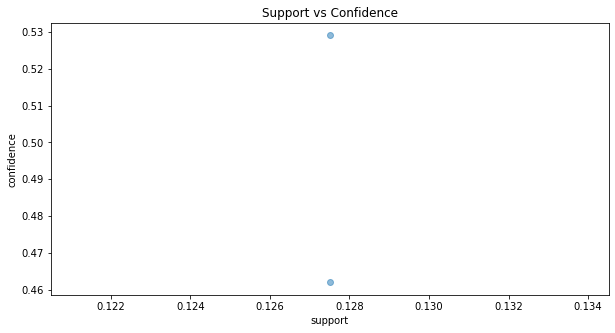

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [22]:
#Using Lift as Metric, keeping min value as 0.7
rules2 = association_rules(freq_items1, metric="lift", min_threshold=0.7)
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GeogBks),(ArtBks),0.276,0.241,0.1275,0.461957,1.916832,0.060984,1.410667
1,(ArtBks),(GeogBks),0.241,0.276,0.1275,0.529046,1.916832,0.060984,1.537304


In [23]:
#Using Confidence as Metric, keeping min value as 75%
rules3 = association_rules(freq_items1, metric="confidence", min_threshold=0.)
rules3.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GeogBks),(ArtBks),0.276,0.241,0.1275,0.461957,1.916832,0.060984,1.410667
1,(ArtBks),(GeogBks),0.241,0.276,0.1275,0.529046,1.916832,0.060984,1.537304


In [35]:
#Keeping Min Support for Apriori as 20%
freq_items2 = apriori(book_2, min_support=0.20, use_colnames=True)
freq_items2

,support,itemsets
0,0.241,(ArtBks)
1,0.276,(GeogBks)


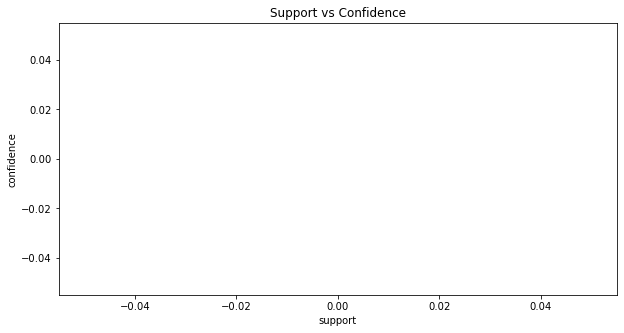

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(rules6['support'], rules6['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:>

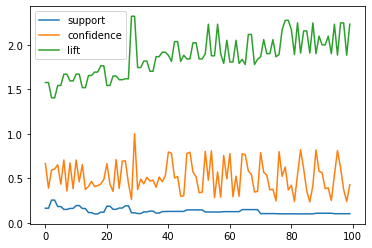

In [39]:
rules[['support', 'confidence','lift' ]].plot()

(array([12., 16., 16., 17., 11.,  8.,  6., 13.,  0.,  1.]),
 array([0.23549884, 0.31194896, 0.38839907, 0.46484919, 0.5412993 ,
        0.61774942, 0.69419954, 0.77064965, 0.84709977, 0.92354988,
        1.        ]),
 <BarContainer object of 10 artists>)

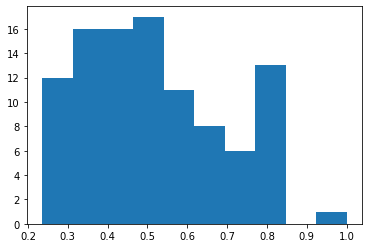

In [43]:
plt.hist(rules['confidence'])

(array([ 6.,  6.,  3., 13.,  8.,  8.,  7., 10.,  7.,  4.,  4.,  4.,  4.,
         2., 10.,  3.,  0.,  0.,  0.,  1.]),
 array([0.23549884, 0.2737239 , 0.31194896, 0.35017401, 0.38839907,
        0.42662413, 0.46484919, 0.50307425, 0.5412993 , 0.57952436,
        0.61774942, 0.65597448, 0.69419954, 0.73242459, 0.77064965,
        0.80887471, 0.84709977, 0.88532483, 0.92354988, 0.96177494,
        1.        ]),
 <BarContainer object of 20 artists>)

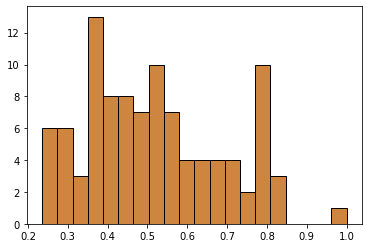

In [46]:
plt.hist(rules['confidence'],bins=20,facecolor ="peru",edgecolor ="black")

(array([40., 24.,  8., 14.,  4.,  6.,  2.,  0.,  0.,  2.]),
 array([0.101 , 0.1165, 0.132 , 0.1475, 0.163 , 0.1785, 0.194 , 0.2095,
        0.225 , 0.2405, 0.256 ]),
 <BarContainer object of 10 artists>)

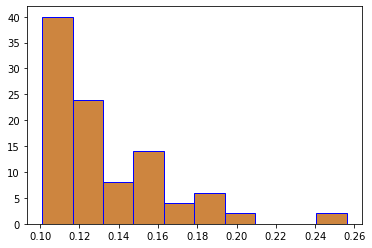

In [48]:
plt.hist(rules['support'],facecolor ="peru",edgecolor ="blue")

{'whiskers': [<matplotlib.lines.Line2D at 0x130b59ae460>,
 'caps': [<matplotlib.lines.Line2D at 0x130b59aea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x130b59ae160>],
 'medians': [<matplotlib.lines.Line2D at 0x130b59aefa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x130b5a162b0>],
 'means': []}

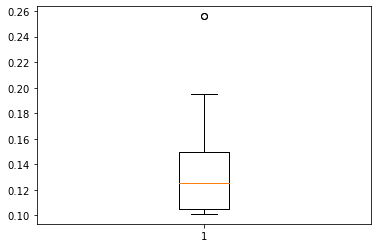

In [49]:
plt.boxplot(rules['support'],vert = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x130b5b10e20>,
 'caps': [<matplotlib.lines.Line2D at 0x130b5b1a400>,
 'boxes': [<matplotlib.lines.Line2D at 0x130b5ae59d0>],
 'medians': [<matplotlib.lines.Line2D at 0x130b5b1a9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x130b5b1ac70>],
 'means': []}

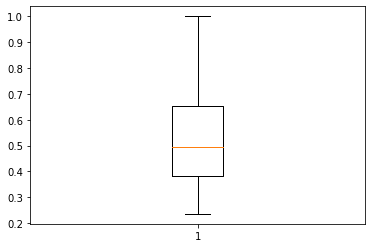

In [50]:
plt.boxplot(rules['confidence'],vert= True)